In [7]:
print ("Regression Analysis to compare estimated weights with the actual weights")

Regression Analysis to compare estimated weights with the actual weights


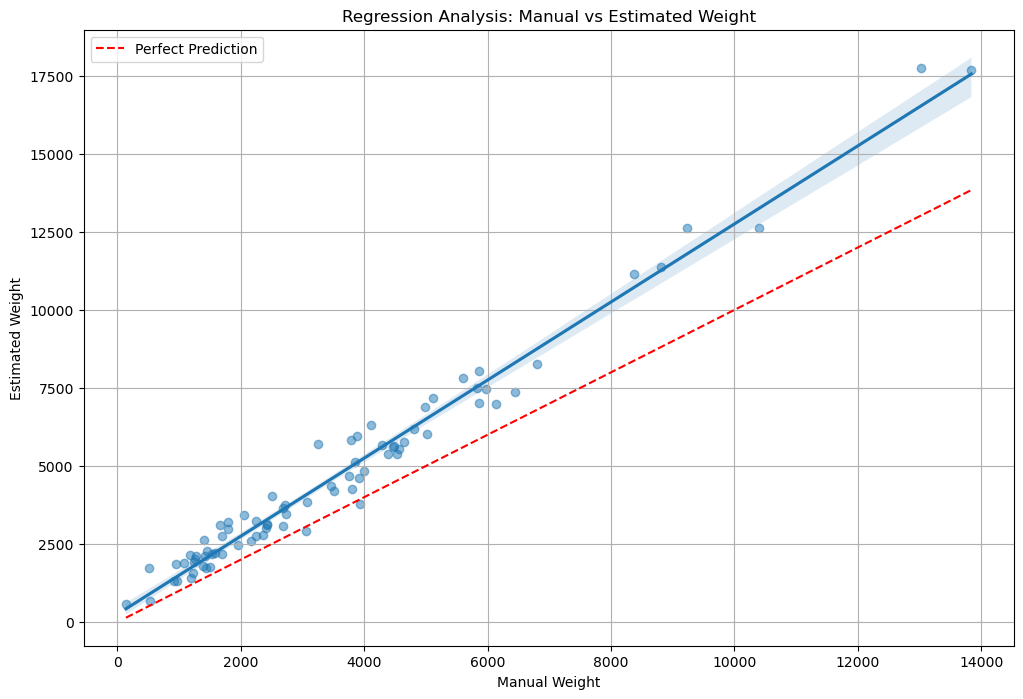


Regression Analysis Results:
--------------------------------------------------
Number of valid samples: 79
Correlation coefficient: 0.988
R-squared: 0.712
Root Mean Square Error: 1419.43
Mean Absolute Error: 1148.45
Mean Error: 1141.00
Mean Percentage Error: 42.68%
Mean Absolute Percentage Error: 42.89%

Summary Statistics:
--------------------------------------------------

Estimated Weight Statistics:
count       79.000000
mean      4701.884937
std       3371.070466
min        593.280000
25%       2233.835000
50%       3746.200000
75%       5893.875000
max      17743.300000
Name: Estimated Weight, dtype: float64

Manual Weight Statistics:
count       79.000000
mean      3560.886076
std       2662.718001
min        140.000000
25%       1560.000000
50%       2730.000000
75%       4555.000000
max      13840.000000
Name: Manual weight, dtype: float64


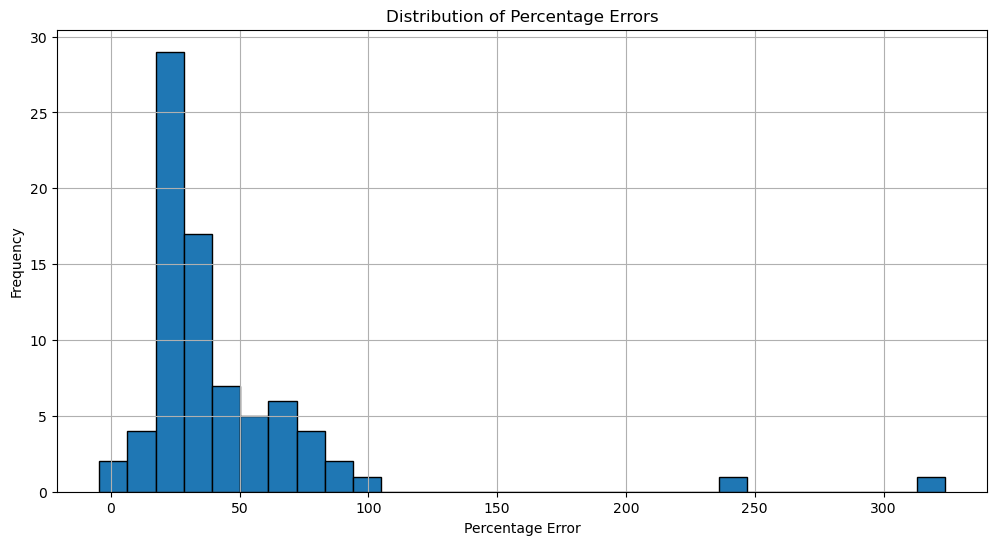

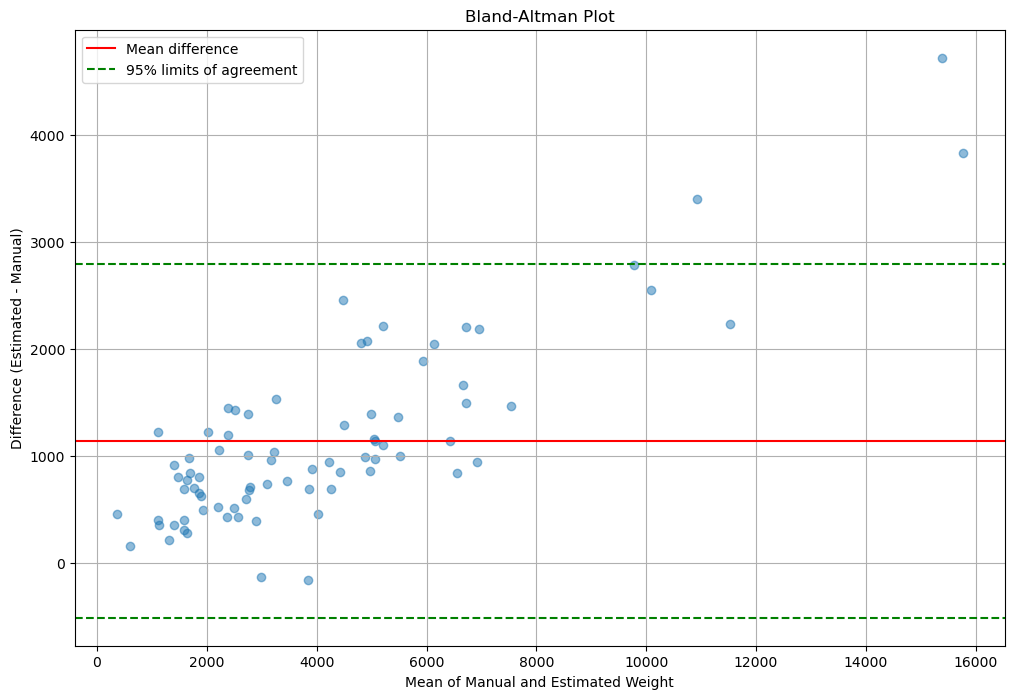

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
data = {
    'Plot ID': ['2502BL4001', '2502BL4002', '2502BL4003', '2502BL4004', '2502BL4005', '2502BL4006', '2502BL4007', '2502BL4008', '2502BL4009', '2502BL4010', '2502BL4011', '2502BL4012', '2502BL4013', '2502BL4014', '2502BL4015', '2502BL4016', '2502BL4017', '2502BL4018', '2502BL4019', '2502BL4020', '2502BL4021', '2502BL4022', '2502BL4023', '2502BL4024', '2502BL4025', '2502BL4026', '2502BL4027', '2502BL4028', '2502BL4029', '2502BL4030', '2502BL4031', '2502BL4032', '2502BL4033', '2502BL4034', '2502BL4035', '2502BL4036', '2502BL4037', '2502BL4038', '2502BL4039', '2502BL4040', '2502BL4041', '2502BL4042', '2502BL4043', '2502BL4044', '2502BL4045', '2502BL4046', '2502BL4047', '2502BL4048', '2502BL4049', '2502BL4050', '2502BL4051', '2502BL4052', '2502BL4053', '2502BL4054', '2502BL4055', '2502BL4056', '2502BL4057', '2502BL4058', '2502BL4059', '2502BL4060', '2502BL4061', '2502BL4062', '2502BL4063', '2502BL4064', '2502BL4065', '2502BL4066', '2502BL4067', '2502BL4068', '2502BL4069', '2502BL4070', '2502BL4071', '2502BL4072', '2502BL4073', '2502BL4074', '2502BL4075', '2502BL4076', '2502BL4077', '2502BL4078', '2502BL4079'],
    'Estimated Weight': [5629.05, 6972.09, 7814.46, 6874.72, 2034.45, 1932.75, 5137.07, 17675.21, 5685.25, 12632.36, 5624.33, 3219.88, 7385.09, 5753.55, 12629.31, 6170.43, 11160.31, 8050.92, 5832.00, 2203.95, 2750.92, 3102.20, 2475.32, 3441.75, 2189.80, 2922.48, 1885.88, 3084.67, 3120.73, 2583.73, 3140.22, 7495.04, 5370.67, 3841.11, 5955.75, 2751.45, 2980.34, 1866.91, 2122.64, 4202.91, 4258.43, 3746.20, 2158.07, 1317.80, 1730.99, 593.28, 1319.71, 1736.17, 2263.72, 1415.03, 1580.82, 2116.97, 1776.08, 688.20, 3247.83, 4035.42, 7466.38, 4347.90, 11362.52, 17743.30, 6015.51, 7167.67, 6321.27, 8268.02, 5537.00, 3002.96, 2788.64, 4847.43, 3773.07, 7002.22, 2626.86, 3643.44, 1787.44, 5703.11, 3464.86, 5396.21, 2187.41, 4613.88, 4695.39],
    'Manual weight': [4490, 6130, 5610, 4990, 1260, 1240, 3850, 13840, 4290, 10400, 4470, 1790, 6440, 4650, 9230, 4810, 8380, 5860, 3780, 1580, 2240, 2420, 1950, 2050, 1540, 3060, 1080, 2690, 1670, 2160, 2430, 5830, 4380, 3080, 3880, 1700, 1790, 950, 1280, 3510, 3800, 2710, 1180, 960, 510, 140, 920, 1430, 1460, 1200, 1230, 1420, 1500, 530, 2240, 2500, 5970, 3470, 8810, 13020, 5020, 5120, 4110, 6800, 4570, 2410, 2360, 4000, 3930, 5860, 1400, 2680, 1390, 3250, 2730, 4540, 1690, 3920, 3750]
}

df = pd.DataFrame(data)

# Remove rows where Manual weight is 0
df = df[df['Manual weight'] > 0]

# Calculate basic statistics
correlation = df['Estimated Weight'].corr(df['Manual weight'])
r2 = r2_score(df['Manual weight'], df['Estimated Weight'])
rmse = np.sqrt(mean_squared_error(df['Manual weight'], df['Estimated Weight']))
mae = mean_absolute_error(df['Manual weight'], df['Estimated Weight'])
mean_error = np.mean(df['Estimated Weight'] - df['Manual weight'])

# Create regression plot
plt.figure(figsize=(12, 8))
sns.regplot(data=df, x='Manual weight', y='Estimated Weight', scatter_kws={'alpha':0.5})
plt.plot([df['Manual weight'].min(), df['Manual weight'].max()], 
         [df['Manual weight'].min(), df['Manual weight'].max()], 
         'r--', label='Perfect Prediction')
plt.xlabel('Manual Weight')
plt.ylabel('Estimated Weight')
plt.title('Regression Analysis: Manual vs Estimated Weight')
plt.legend()
plt.grid(True)
plt.show()

# Calculate percentage error
df['Percentage Error'] = ((df['Estimated Weight'] - df['Manual weight']) / df['Manual weight']) * 100

# Print results
print("\nRegression Analysis Results:")
print("-" * 50)
print(f"Number of valid samples: {len(df)}")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"R-squared: {r2:.3f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Error: {mean_error:.2f}")
print(f"Mean Percentage Error: {df['Percentage Error'].mean():.2f}%")
print(f"Mean Absolute Percentage Error: {df['Percentage Error'].abs().mean():.2f}%")

# Additional analysis
print("\nSummary Statistics:")
print("-" * 50)
print("\nEstimated Weight Statistics:")
print(df['Estimated Weight'].describe())
print("\nManual Weight Statistics:")
print(df['Manual weight'].describe())

# Plot histogram of errors
plt.figure(figsize=(12, 6))
plt.hist(df['Percentage Error'], bins=30, edgecolor='black')
plt.title('Distribution of Percentage Errors')
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bland-Altman Plot
difference = df['Estimated Weight'] - df['Manual weight']
mean = (df['Estimated Weight'] + df['Manual weight']) / 2
mean_diff = np.mean(difference)
std_diff = np.std(difference)

plt.figure(figsize=(12, 8))
plt.scatter(mean, difference, alpha=0.5)
plt.axhline(y=mean_diff, color='r', linestyle='-', label='Mean difference')
plt.axhline(y=mean_diff + 1.96*std_diff, color='g', linestyle='--', label='95% limits of agreement')
plt.axhline(y=mean_diff - 1.96*std_diff, color='g', linestyle='--')
plt.xlabel('Mean of Manual and Estimated Weight')
plt.ylabel('Difference (Estimated - Manual)')
plt.title('Bland-Altman Plot')
plt.legend()
plt.grid(True)
plt.show()